In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

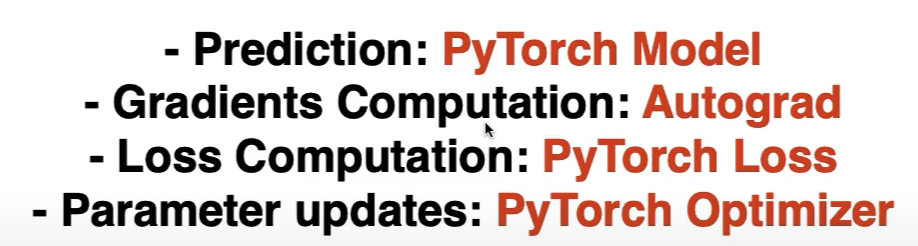

es esencial conocer los pasos basicos, vamos a implemetar el modelo, construir el loss y optim y despues el training loop ( forward: pred y loss, backward : gradientes, update)

- 1 preparacion de los datos

In [ ]:
bc = datasets.load_breast_cancer()
X , y = bc.data, bc.target

n_samples , n_features = X.shape #vemos que tenemos 30 features que es bastante, las features son las columnas de data

X_train , X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#hay que escalar o normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#ahora hay que transformarlos en tensores ya que ahoira los tenemos en np y ademnas darles el type
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
# tenemos que transformar nuestras y ya que ahora mismo son una fila con muchos datos y queremos una columan con esos datos por filas
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

ahora hay que crear nuestro modelo que en este caso es una LR

In [ ]:
class LR(nn.Module):

  def __init__(self, n_input_features):
    super(LR, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self,x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = LR(n_features)


una vez tenemos nuestra clase del modelo y los hemos instanciadco(model) debemos calcular el loss y optim

In [ ]:
criterion = nn.BCELoss() #ES lr usamos la binazry cross entrpy loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

el ultimo paso es crear nuestro loop de entrenamiento

In [ ]:
num_epochs = 200 #es simplemente el numero  de iteraciones

for epoch in range(num_epochs):
  #primero hacemos el forward pass y loss
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)
  #despues el backward
  loss.backward()
  #y por ultimo actualizar los weights
  optimizer.step()
  # no olvidarse de poner a zero los grads
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0: #cada 10 pasos
    print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')


#ahora hay que evaluar el modelo

with torch.no_grad():
  y_pred = model(X_test)
  y_pred_cls = y_pred.round()
  acc = y_pred_cls.eq(y_test).sum()/ float(y_test.shape[0]) #
  print (f'acc= {acc:.4f}')




epoch: 10, loss: 0.0718
epoch: 20, loss: 0.0717
epoch: 30, loss: 0.0715
epoch: 40, loss: 0.0714
epoch: 50, loss: 0.0712
epoch: 60, loss: 0.0711
epoch: 70, loss: 0.0710
epoch: 80, loss: 0.0708
epoch: 90, loss: 0.0707
epoch: 100, loss: 0.0705
epoch: 110, loss: 0.0704
epoch: 120, loss: 0.0703
epoch: 130, loss: 0.0701
epoch: 140, loss: 0.0700
epoch: 150, loss: 0.0699
epoch: 160, loss: 0.0697
epoch: 170, loss: 0.0696
epoch: 180, loss: 0.0695
epoch: 190, loss: 0.0693
epoch: 200, loss: 0.0692
acc= 0.9649
<generator object Module.parameters at 0x7ee297193530>


In [ ]:
class MyModule(nn.Module):
    """Some Information about MyModule"""
    def __init__(self):
        super(MyModule, self).__init__()

    def forward(self, x):

        return x
    
    
    
model _()mode.initialize        


falta meter los minibatch